In [127]:
import pandas as pd
import numpy as np
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [128]:
df = pd.read_csv('/kaggle/input/okcupid-profiles/okcupid_profiles.csv')

In [130]:


columns_for_fill=["body_type","diet", "education","drinks", "drugs","ethnicity",
      "job","offspring","pets","religion","sign", "smokes", "speaks"
     ]


df['height'] = df['height'] *2.45
df["income"]=df["income"].replace(-1, 0)
df['sign'] = df['sign'].apply(lambda x: str(x).split()[0])
df['religion'] = df['religion'].apply(lambda x: str(x).split()[0])
df['job'] = df['job'].apply(lambda x: str(x).split()[0])

In [209]:
df['ethnicity'] = df['ethnicity'].apply(lambda x: str(x).split()[0]).apply(lambda x: str(x).split(',')[0])

In [131]:
df['profile information'] = df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ". ".join([str(essay) for essay in x]), axis =  1)

In [132]:
df=df.drop([col for col in df.columns if 'essay' in col], axis=1)

In [133]:
cat_vars

['status',
 'sex',
 'orientation',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'job',
 'last_online',
 'location',
 'offspring',
 'pets',
 'religion',
 'sign',
 'smokes',
 'speaks',
 'age groups']

## EDA
- Missing values
- Numeric features
- Categorical features
- Text features

### Missing Values

<Axes: >

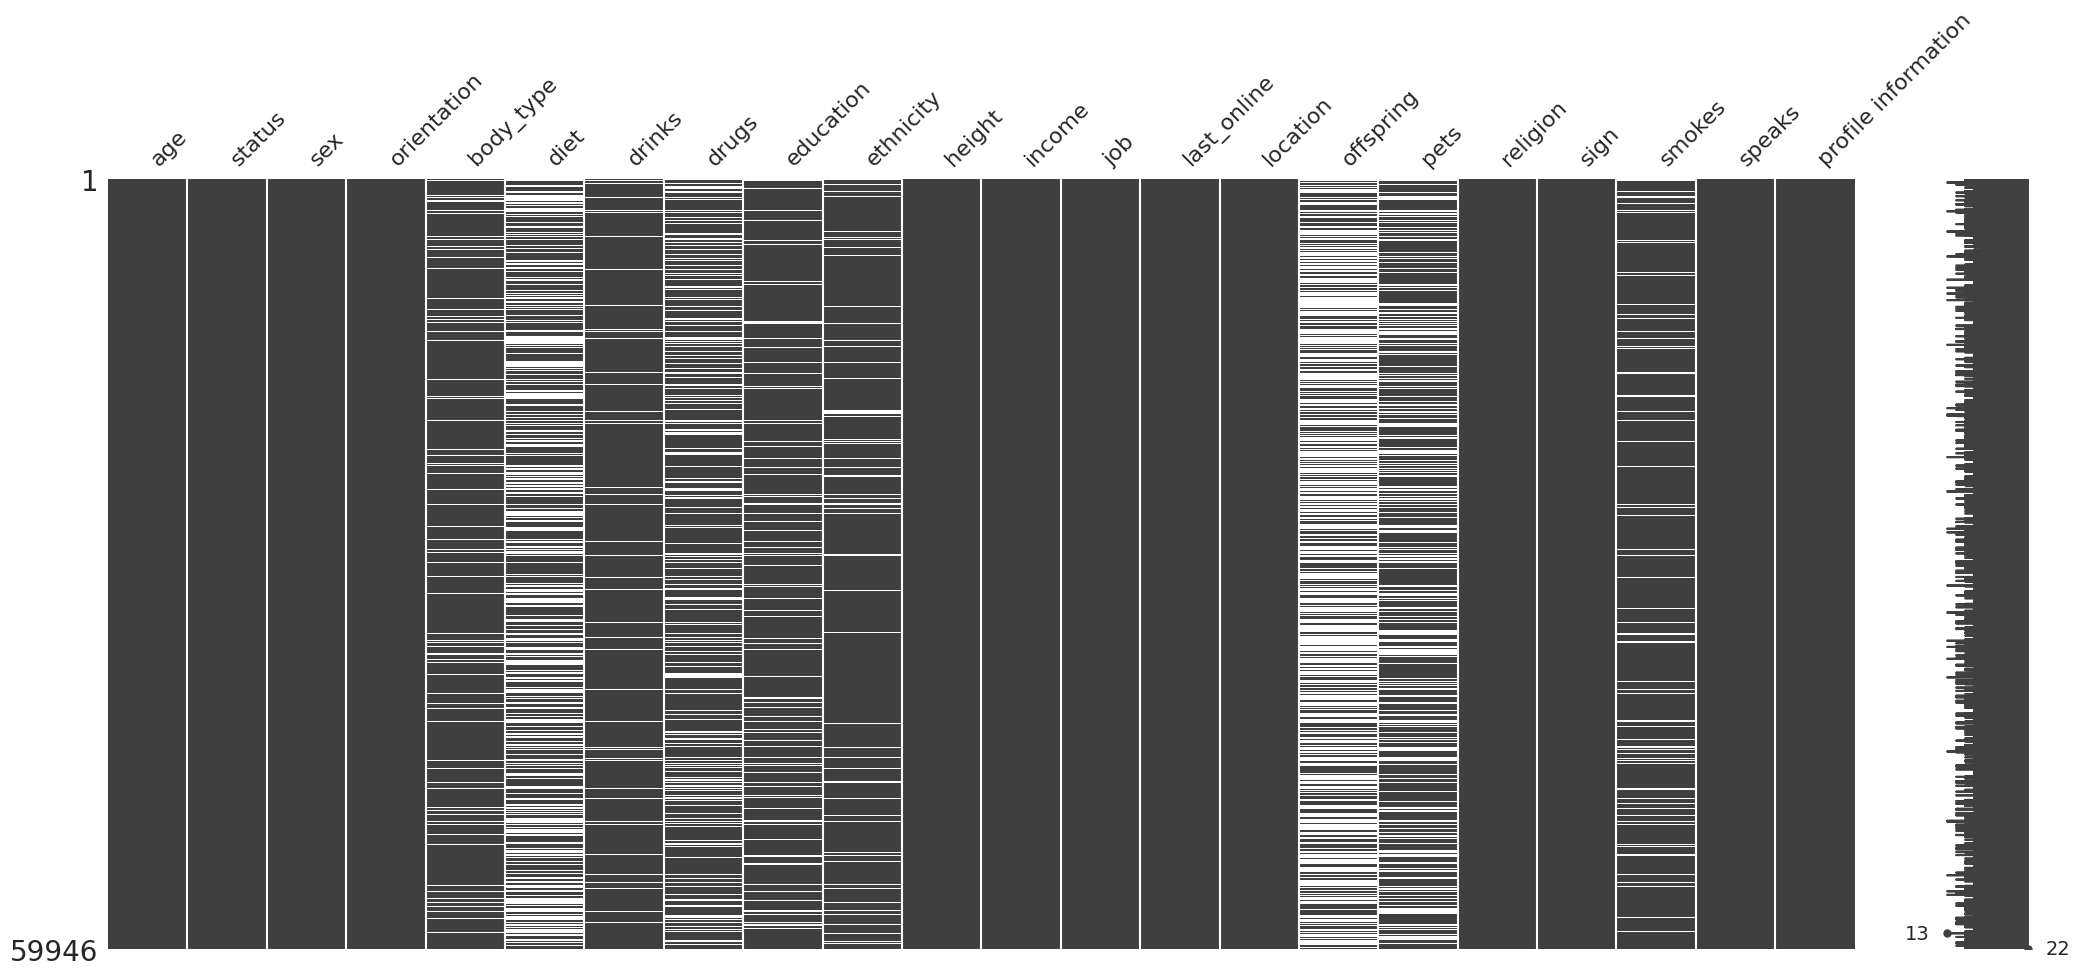

In [134]:
msno.matrix(df)

<Axes: >

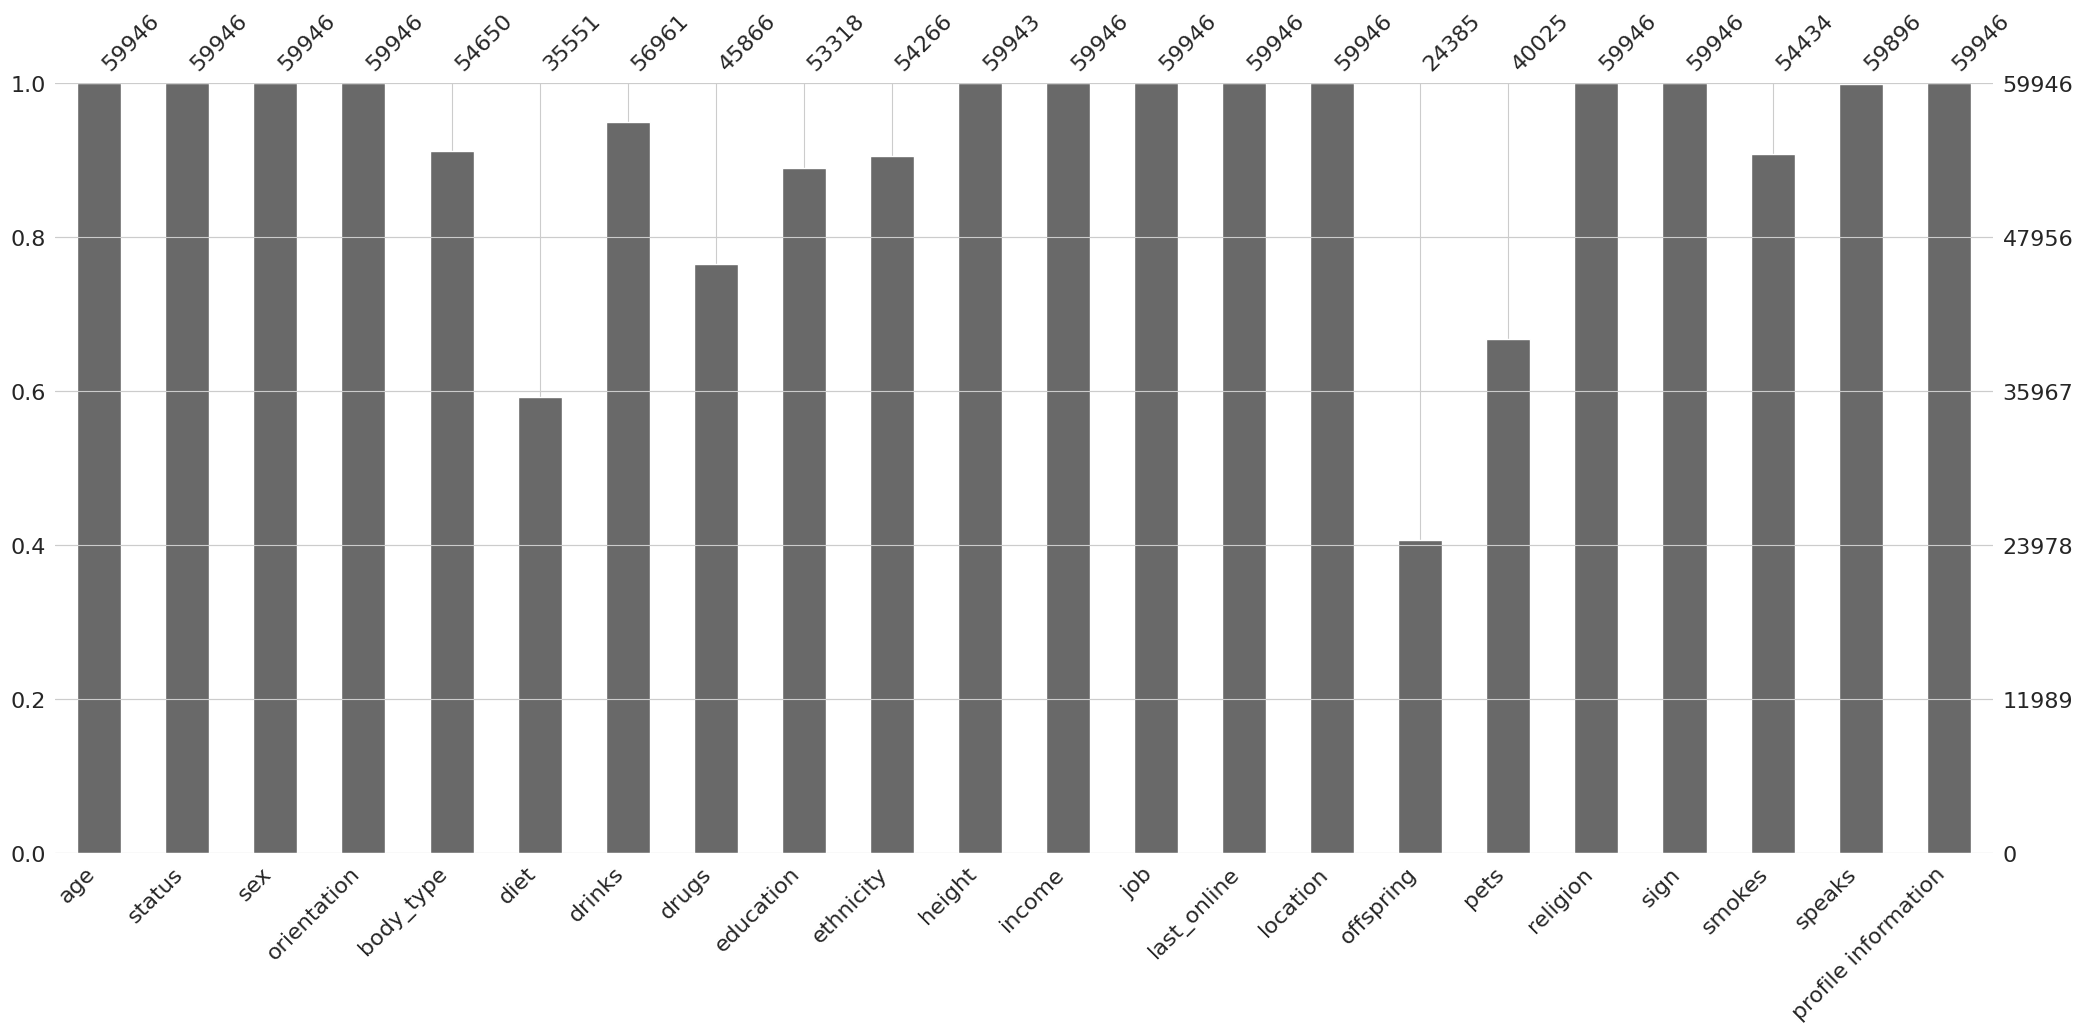

In [135]:
msno.bar(df)

In [136]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

df[vars_with_na].isnull().mean().sort_values(ascending=False)

offspring    0.593217
diet         0.406950
pets         0.332316
drugs        0.234878
education    0.110566
ethnicity    0.094752
smokes       0.091949
body_type    0.088346
drinks       0.049795
speaks       0.000834
height       0.000050
dtype: float64

### Variables types

In [137]:
df[columns_for_fill]=df[columns_for_fill].fillna("No info")
df["height"]=df["height"].fillna(0)
df["profile information"]=df["profile information"].fillna("No info")

In [138]:
# let's identify the categorical variables

cat_vars = [var for var in df.columns if df[var].dtype == 'O' and 'profile information' not in var]


# number of categorical variables
print('Number of categoricl variables: ', len(cat_vars))

Number of categoricl variables:  18


In [139]:
text_vars = [var for var in df.columns if 'profile information'  in var]
print('Number of text variables: ', len(text_vars))

Number of text variables:  1


In [140]:
num_vars = [
    var for var in df.columns if var not in cat_vars + text_vars
]

print('Number of numeric variables: ', len(num_vars))

Number of numeric variables:  3


In [141]:
num_vars

['age', 'height', 'income']

In [142]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    df[var].unique()) < 20 ]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


In [143]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  2


In [144]:
# let's visualise the continuous variables

df[cont_vars].head()

,age,height
0,22,450.1875
1,35,420.1750
2,38,408.1700
3,23,426.1775
4,29,396.1650


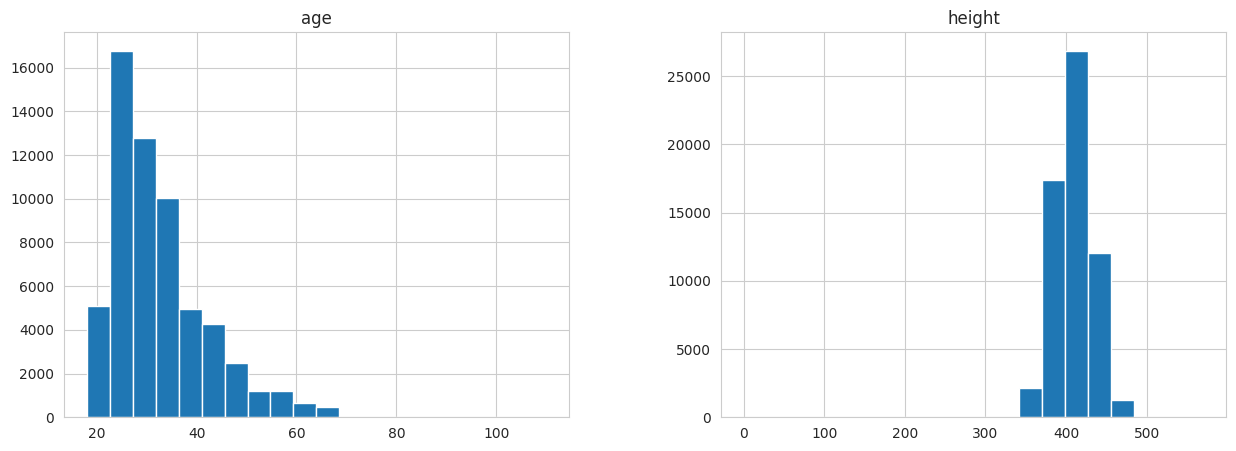

In [145]:
# lets plot histograms for all continuous variables
# TODO рост перевести в см
df[cont_vars].hist(bins=20, figsize=(15,5))
plt.show()

## Cardinality

<Axes: >

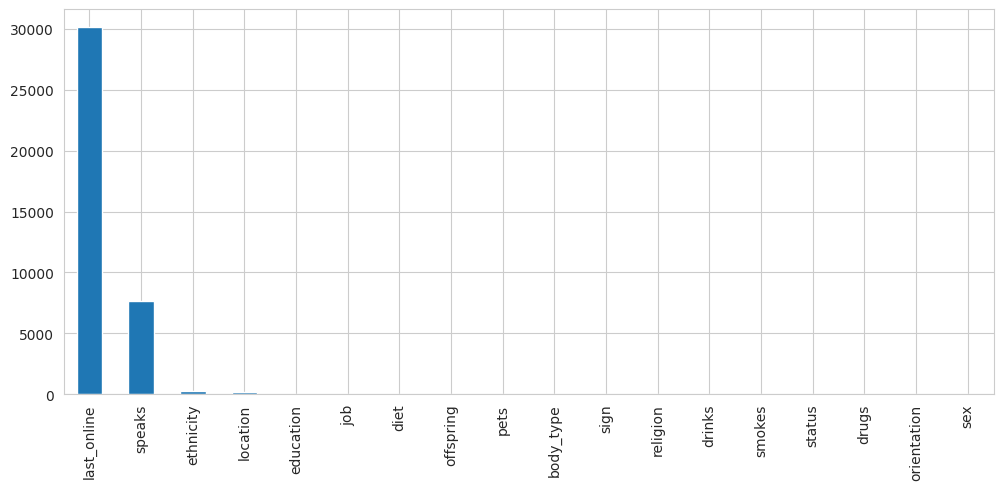

In [146]:

df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

## Rare labels

In [147]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['age'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_vars:
    print('*'*100)
    print(analyse_rare_labels(df, var, 0.01))
    print()

****************************************************************************************************
status
married    0.005171
unknown    0.000167
Name: age, dtype: float64

****************************************************************************************************
Series([], Name: age, dtype: float64)

****************************************************************************************************
Series([], Name: age, dtype: float64)

****************************************************************************************************
body_type
jacked            0.007023
overweight        0.007407
rather not say    0.003303
used up           0.005922
Name: age, dtype: float64

****************************************************************************************************
diet
halal              0.000183
kosher             0.000183
mostly halal       0.000801
mostly kosher      0.001435
mostly vegan       0.005638
other              0.005522
strictly halal     0.0003

In [148]:
# !pip install translate

# from translate import Translator
# translator= Translator(to_lang="Russian")
# translation = translator.translate("Good Morning!")

# # !pip install googletrans
# from googletrans import Translator
# translator = Translator()
# translator.translate('dota fuck')

# df[text_vars[0]].head(5).apply(lambda x: translator.translate(str(x)))

In [149]:
#for 
#sns.heatmap(df[num_vars].corr(), cmap = 'coolwarm',annot = True)

<Axes: >

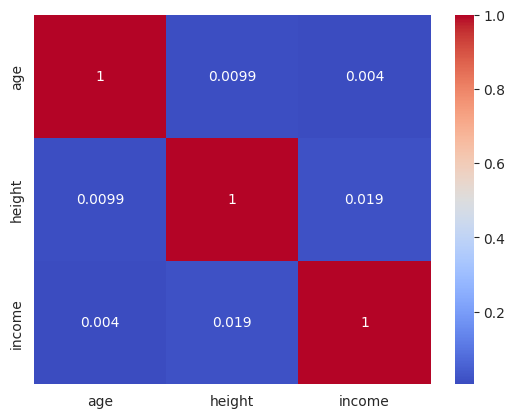

In [150]:
sns.heatmap(df.query('sex == "m"')[num_vars].corr(), cmap = 'coolwarm',annot = True)

In [151]:
#sns.heatmap(df.query('ethnicity.str.contains("white")')[num_vars].corr(), cmap = 'coolwarm',annot = True)

In [163]:
def countplot(df,group, mean):
    df = df.copy()
    (df
        .groupby(group)
         [[mean]]
         .mean()
        ).sort_values(mean).plot(kind='barh')
    plt.xlabel(mean)
    plt.title(f'Группировка по {group} усредняя по {mean}')

## AGe

<Axes: xlabel='age', ylabel='count'>

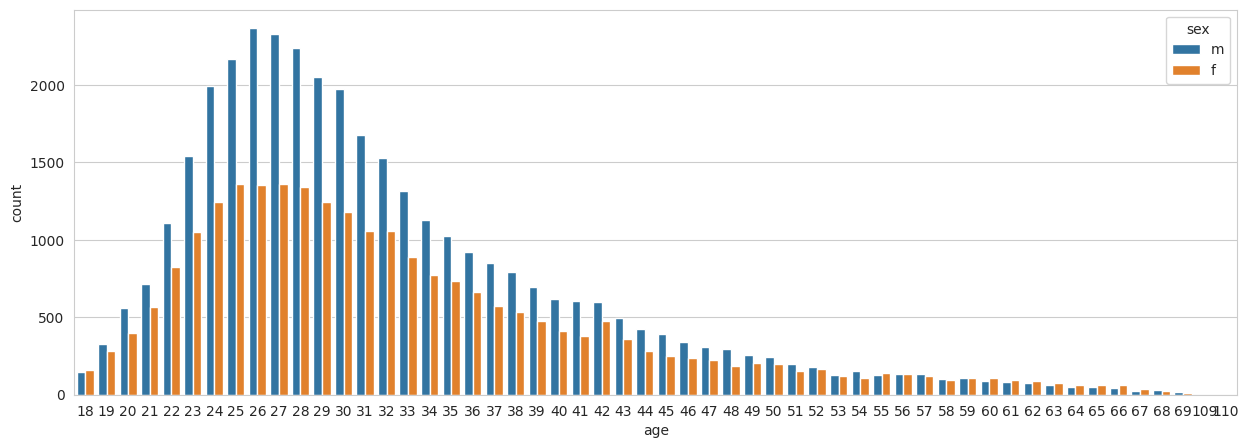

In [152]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'age', hue ='sex')

In [153]:
def age_bins(row):
    if row >= 18 and row<24:
        return '18-24'
    if row >= 24 and row<30:
        return '24-30'
    if row >= 30 and row<35:
        return '30-35'
    if row >= 35 and row<40:
        return '35-40'
    if row >= 40 and row<50:
        return '40-50'
    if row >= 60 and row<70:
        return '60-70'
    if row >= 70 and row<2:
        return 'over 70'
df['age groups'] = df['age'].apply(age_bins)

In [154]:
## больше зарабатывают в групах 18-24 и в 40-50, что немного странно, веть рассвет карьеры наступает в 30-35 лет
(df
 .groupby("age groups")
 [["income"]]
 .mean()
 .sort_index()
 .sort_values(by="income", ascending=False)
)

,income
age groups,
18-24,21596.146335
40-50,21500.408831
30-35,21221.082757
35-40,20017.889088
24-30,18674.738841
60-70,15582.398619


## Status

<Axes: xlabel='status', ylabel='count'>

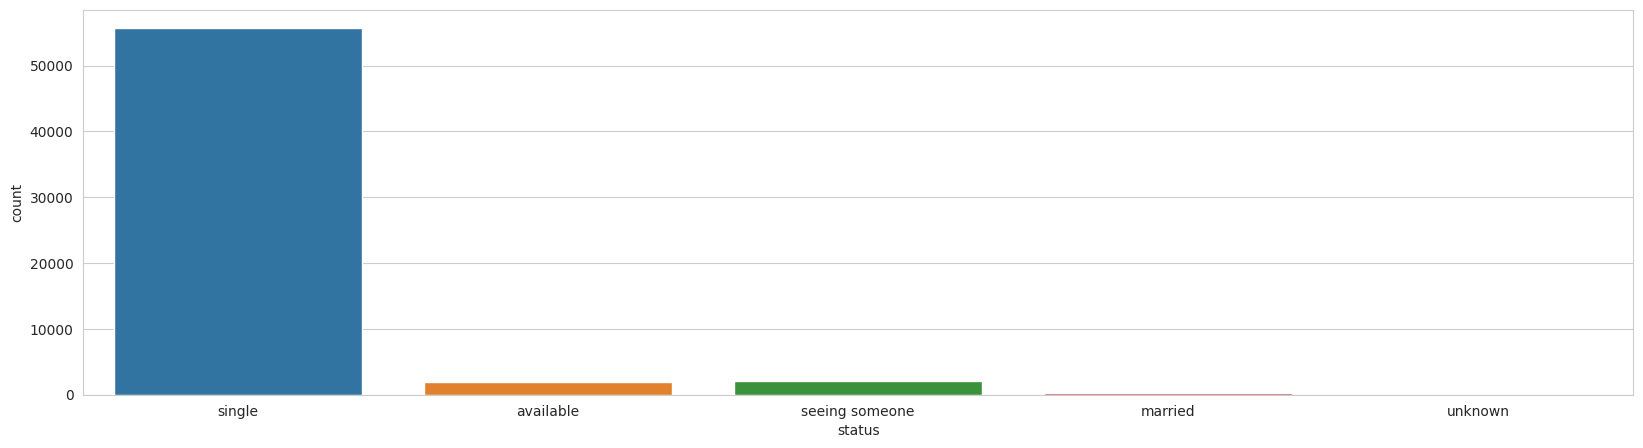

In [155]:
plt.figure(figsize=(20, 5))
sns.countplot(x='status', data=df,
)

<Axes: xlabel='status', ylabel='count'>

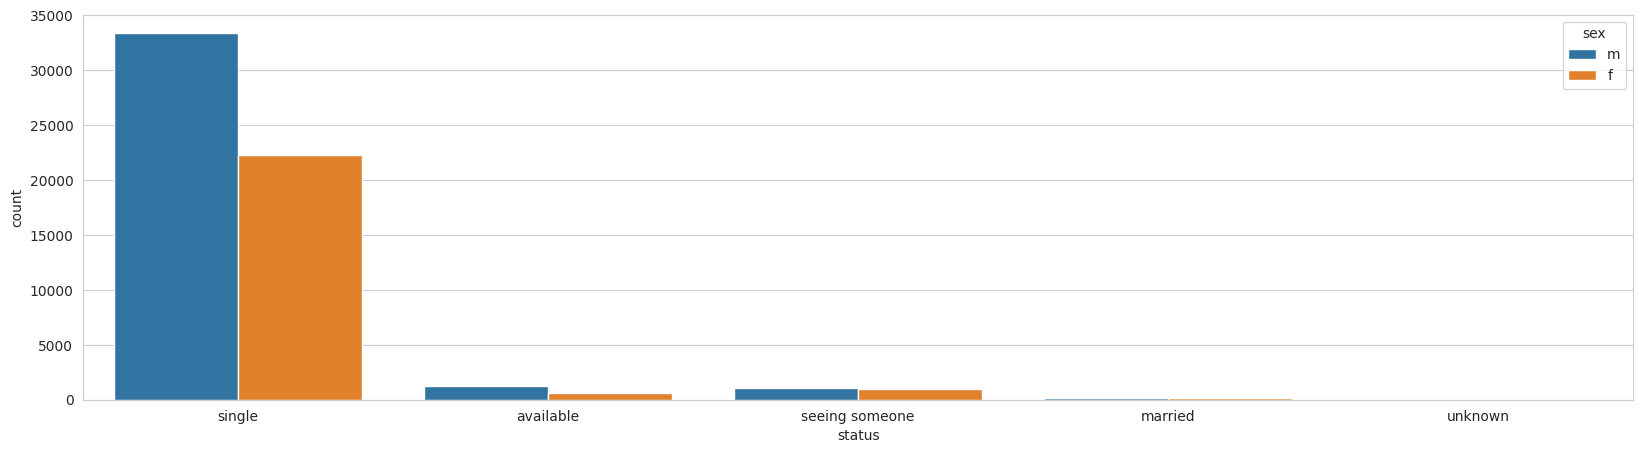

In [156]:
plt.figure(figsize=(20, 5))
sns.countplot(x='status', data=df,
hue='sex')

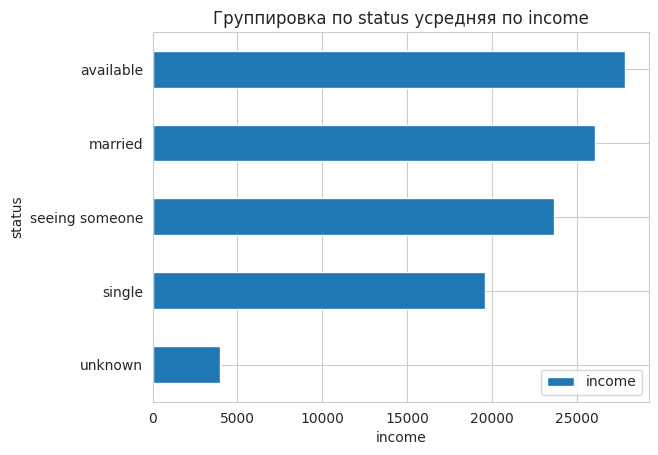

In [164]:
countplot(df,group = 'status', mean = 'income')

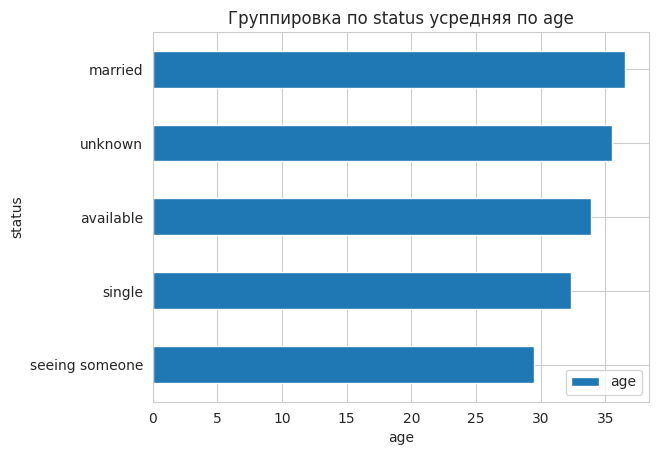

In [165]:
countplot(df,group = 'status', mean = 'age')

## Orientation

<Axes: xlabel='orientation', ylabel='count'>

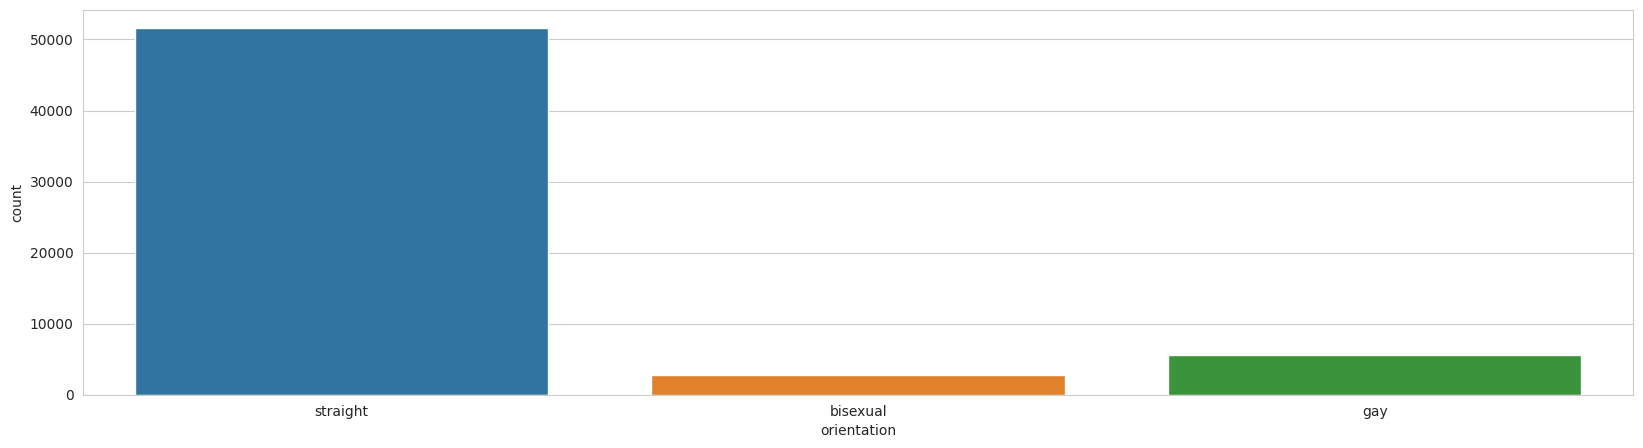

In [167]:
plt.figure(figsize=(20, 5))
sns.countplot(x='orientation', data=df,
)

<Axes: xlabel='orientation', ylabel='count'>

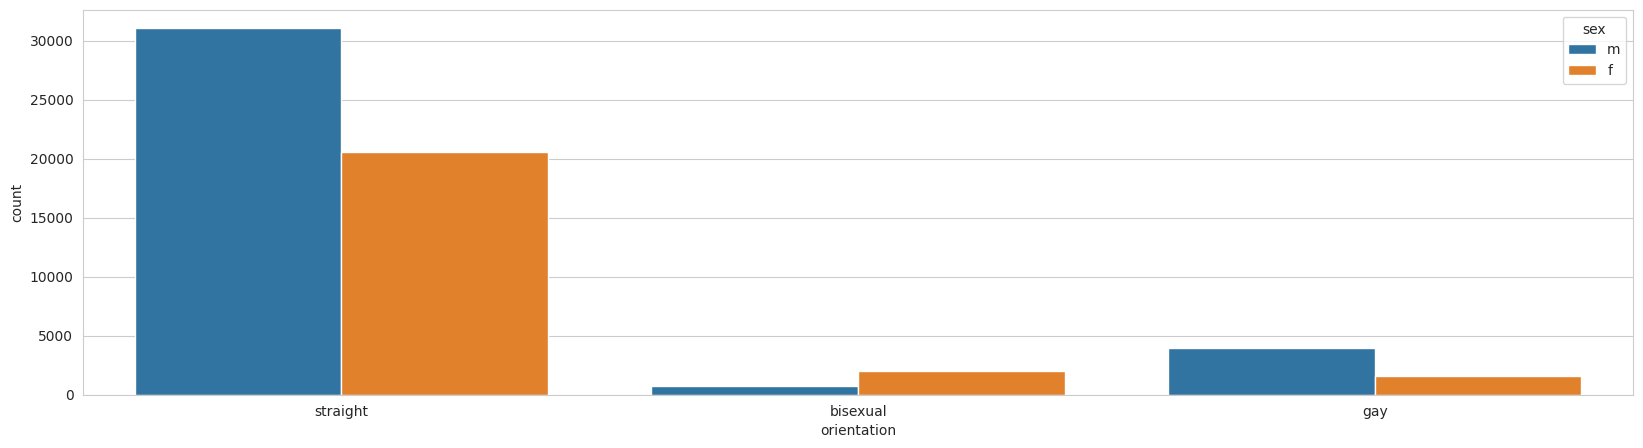

In [169]:
plt.figure(figsize=(20, 5))
sns.countplot(x='orientation', data=df,
hue='sex')

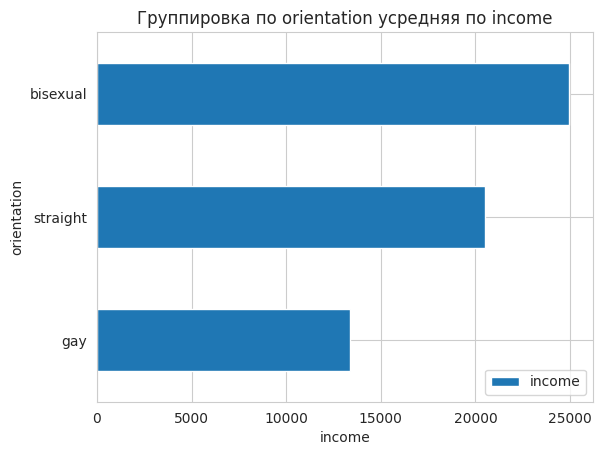

In [170]:
countplot(df,group = 'orientation', mean = 'income')

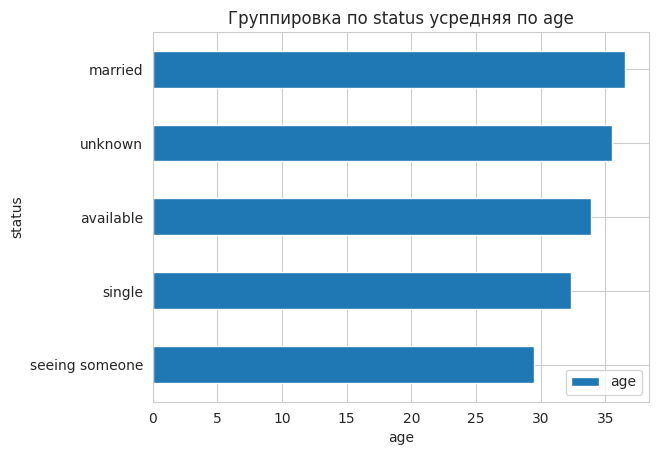

In [171]:
countplot(df,group = 'status', mean = 'age')

## Body type

<Axes: xlabel='body_type', ylabel='count'>

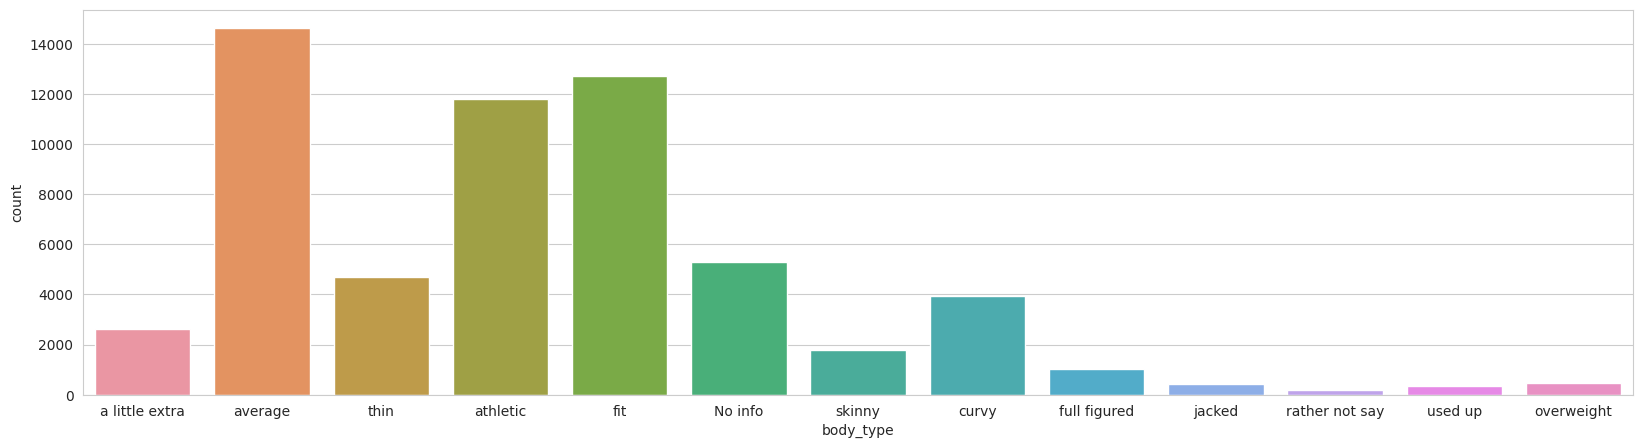

In [174]:
plt.figure(figsize=(20, 5))
sns.countplot(x='body_type', data=df,
)

<Axes: xlabel='body_type', ylabel='count'>

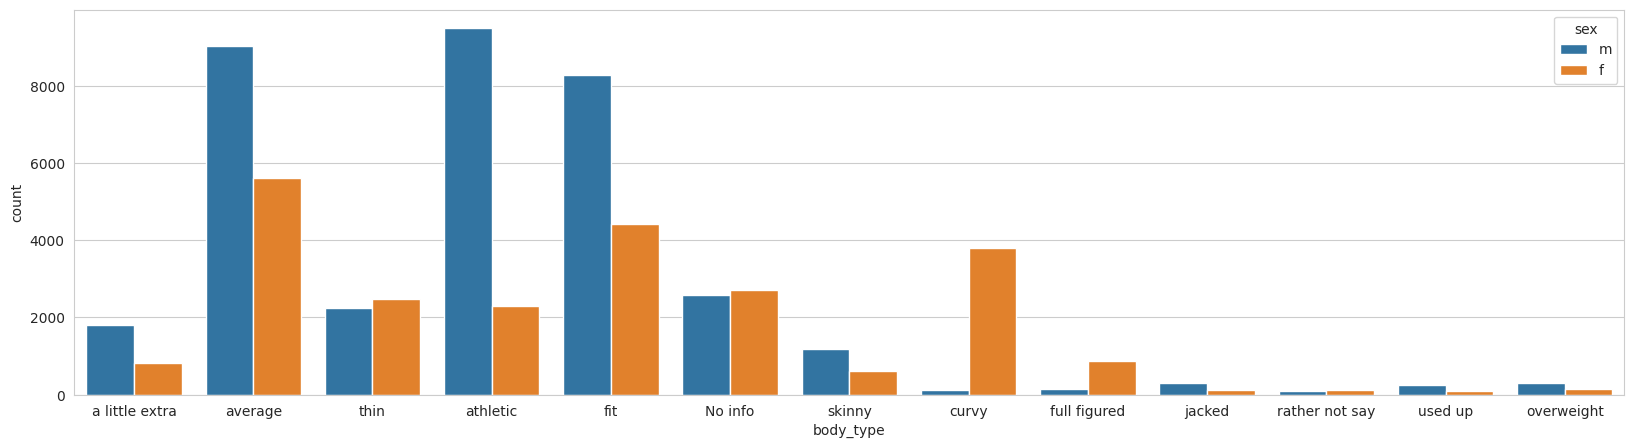

In [175]:
plt.figure(figsize=(20, 5))
sns.countplot(x='body_type', data=df,
hue='sex')

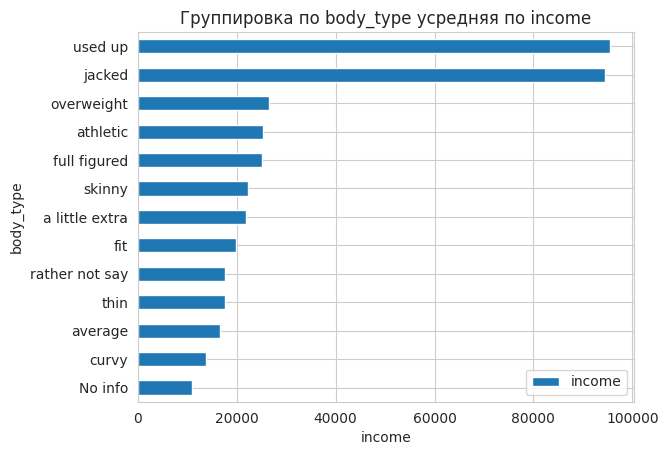

In [176]:
countplot(df,group = 'body_type', mean = 'income')

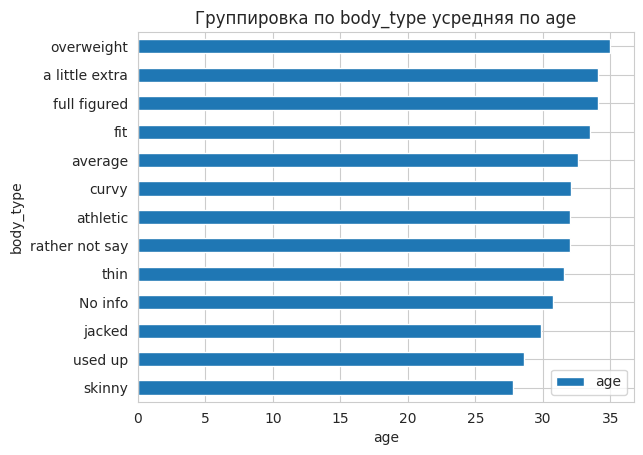

In [177]:
countplot(df,group = 'body_type', mean = 'age')

## Diet

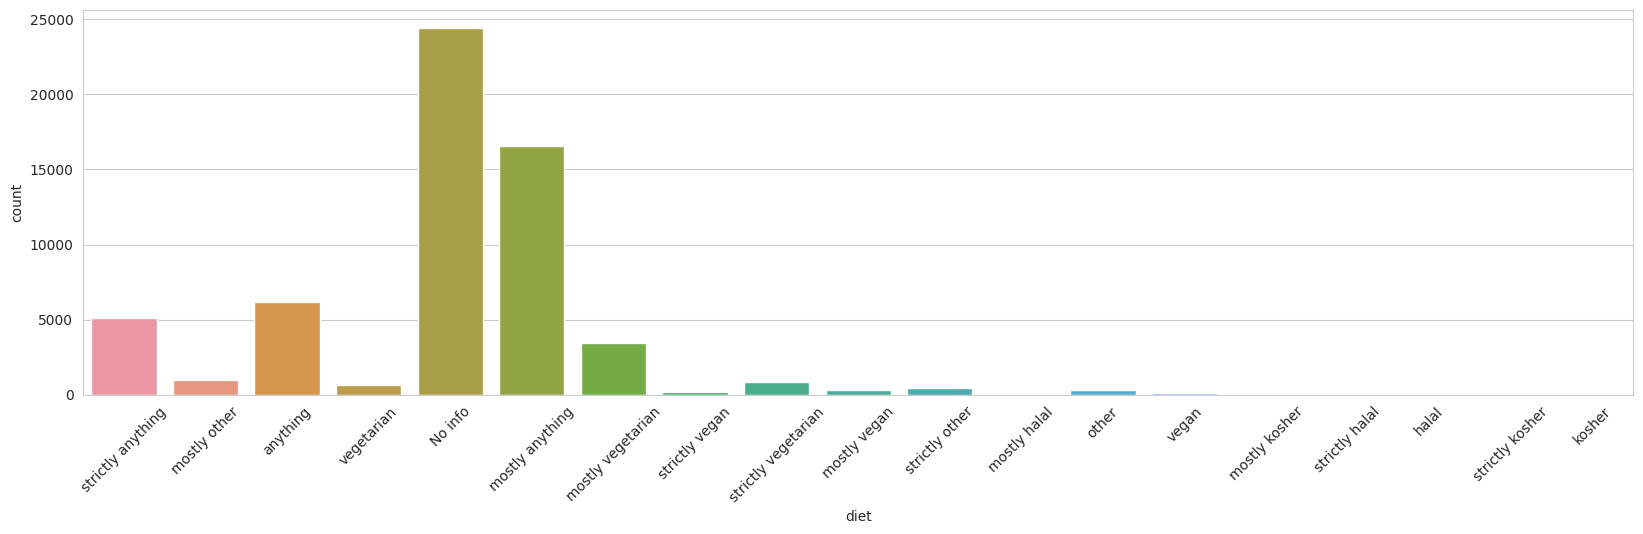

In [180]:
plt.figure(figsize=(20, 5))
sns.countplot(x='diet', data=df,
)
plt.xticks(rotation = 45)
plt.show()

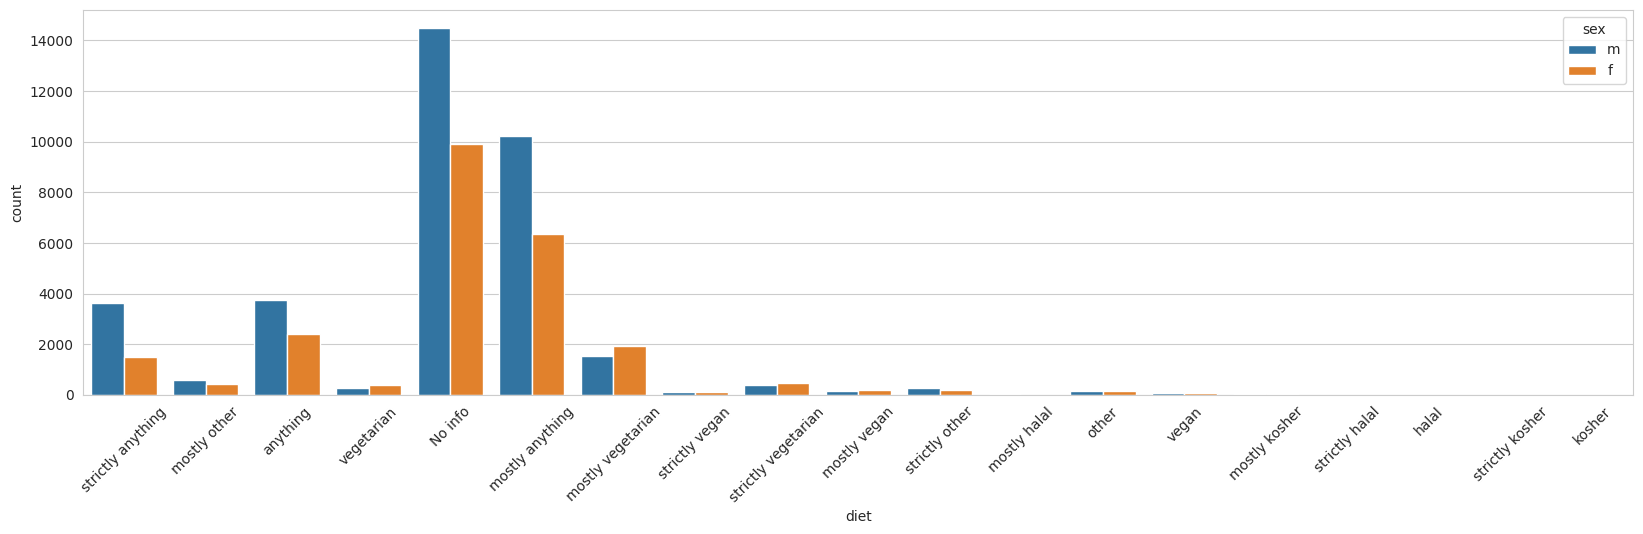

In [182]:
plt.figure(figsize=(20, 5))
sns.countplot(x='diet', data=df,
hue='sex')
plt.xticks(rotation = 45)
plt.show()

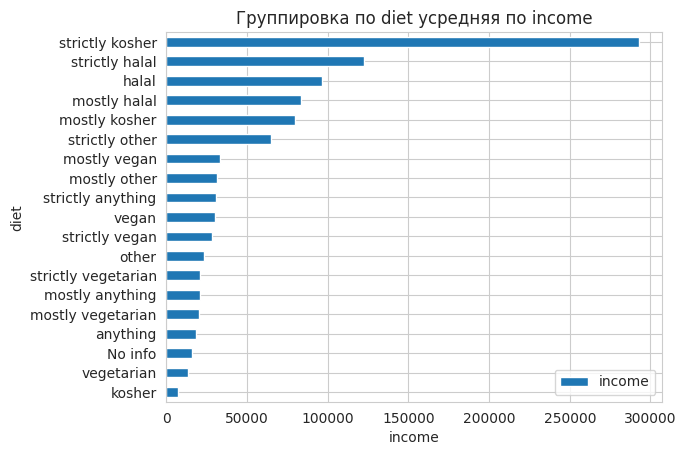

In [185]:
countplot(df,group = 'diet', mean = 'income')

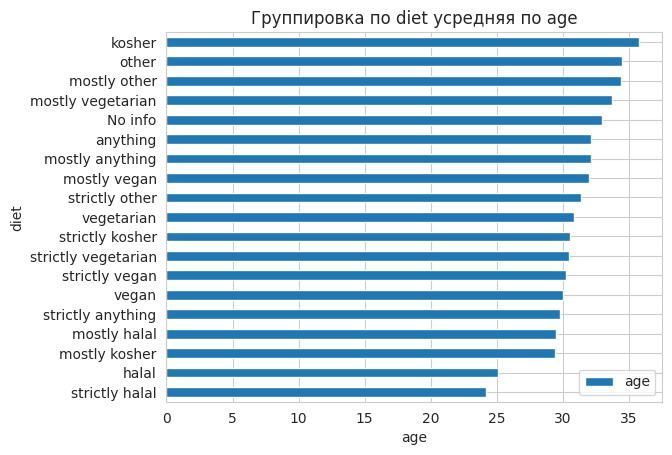

In [186]:
countplot(df,group = 'diet', mean = 'age')

## Drinks

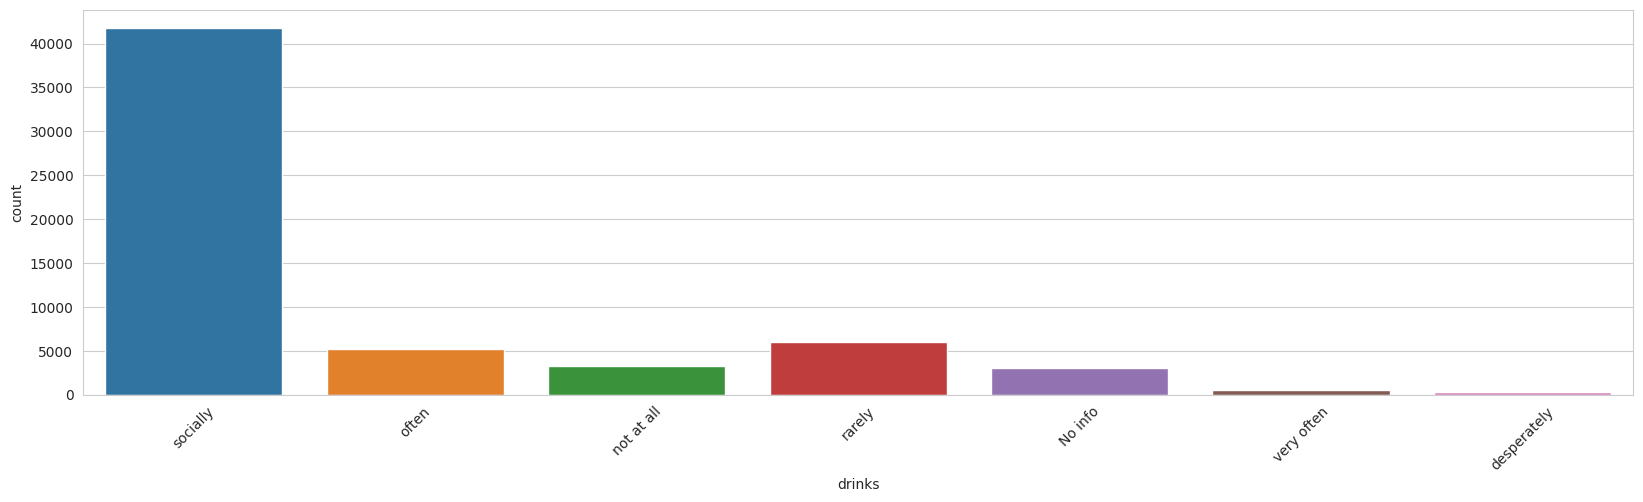

In [188]:
plt.figure(figsize=(20, 5))
sns.countplot(x='drinks', data=df,
)
plt.xticks(rotation = 45)
plt.show()

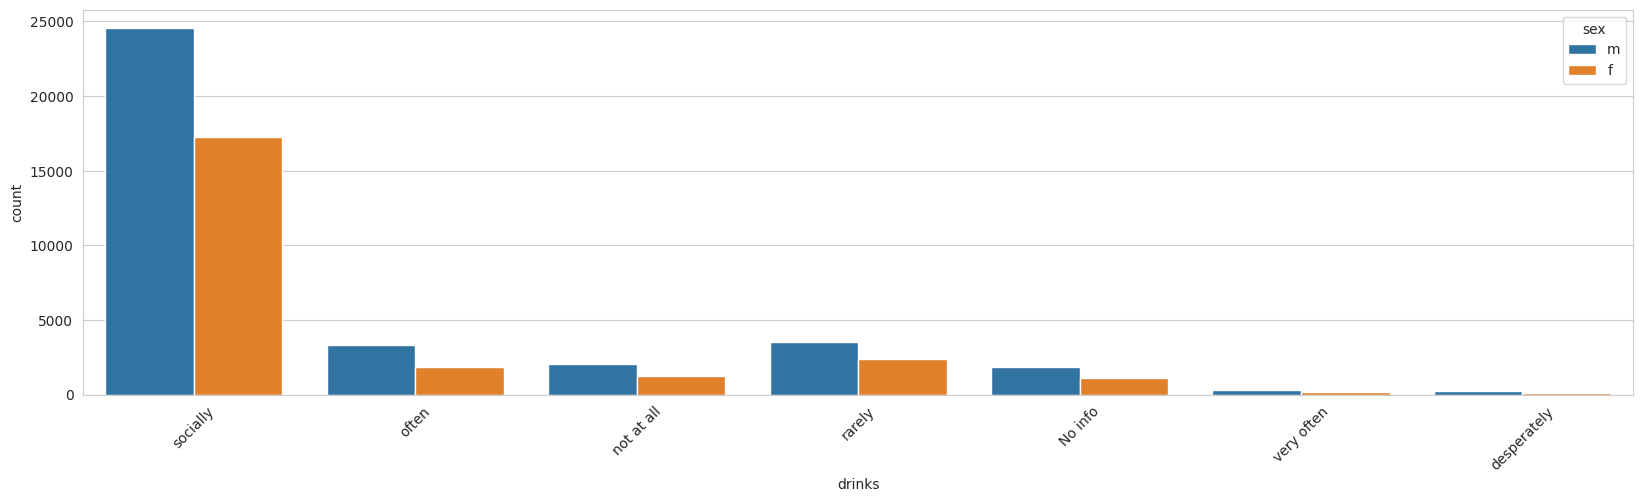

In [189]:
plt.figure(figsize=(20, 5))
sns.countplot(x='drinks', data=df,
hue='sex')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x='drinks', data=df,
hue='sex')
plt.xticks(rotation = 45)
plt.show()

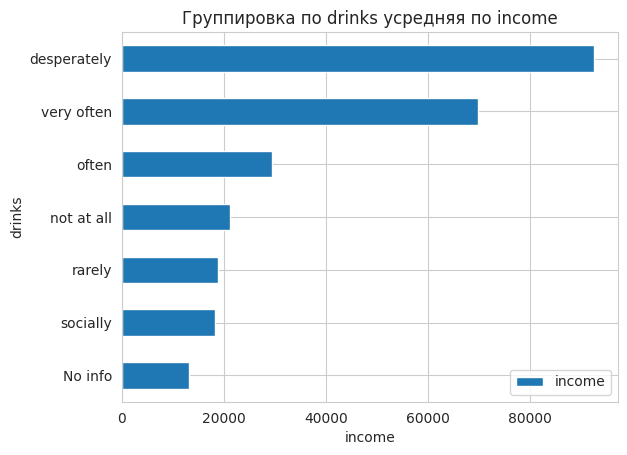

In [190]:
countplot(df,group = 'drinks', mean = 'income')

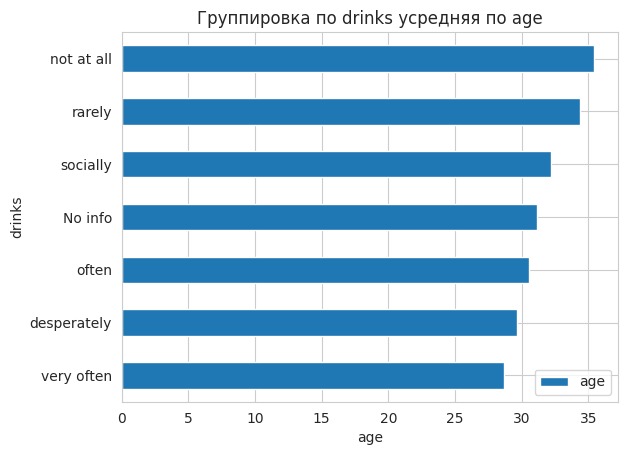

In [191]:
countplot(df,group = 'drinks', mean = 'age')

## Drugs

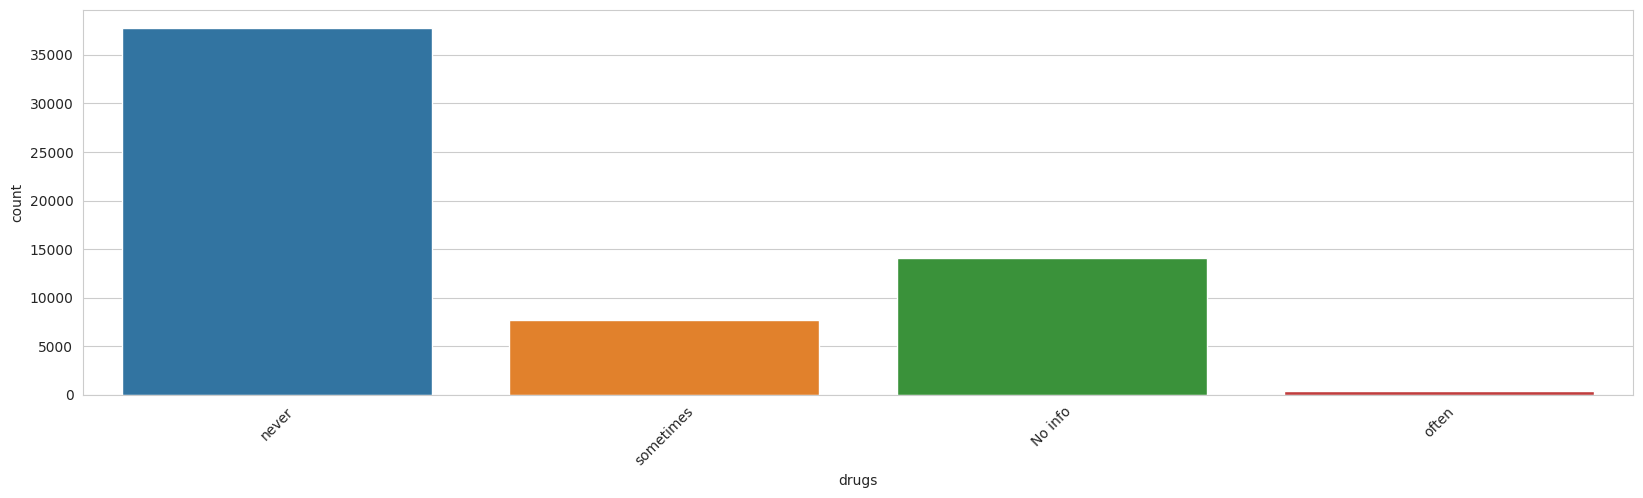

In [192]:
plt.figure(figsize=(20, 5))
sns.countplot(x='drugs', data=df,
)
plt.xticks(rotation = 45)
plt.show()

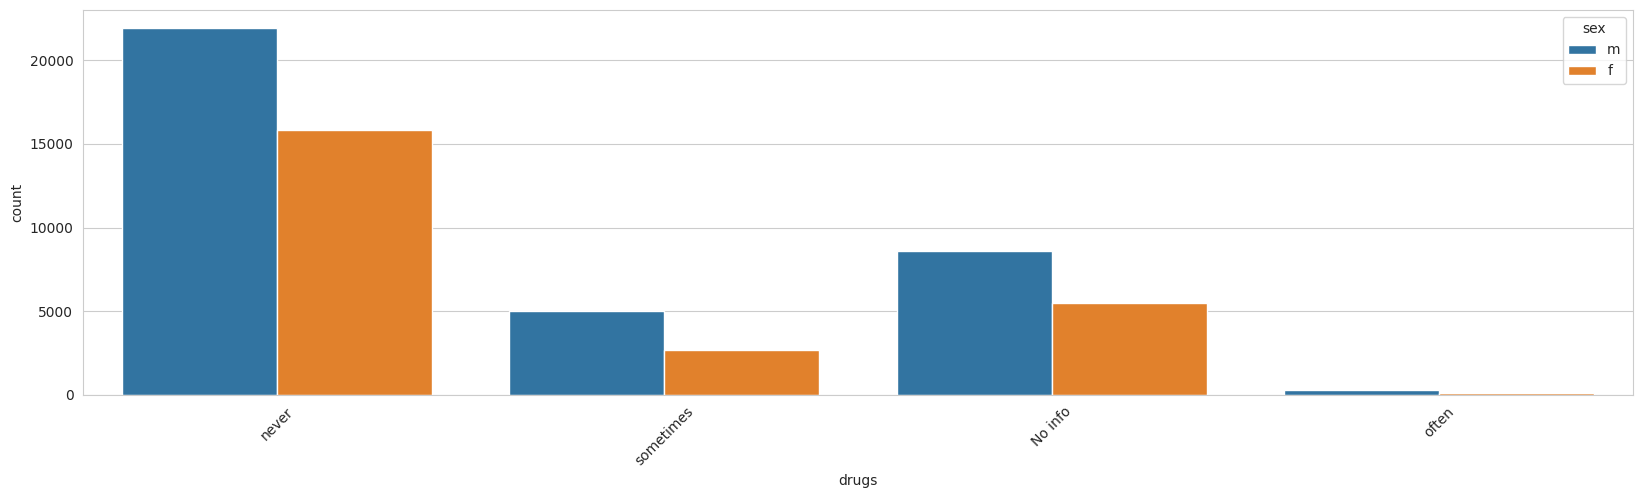

In [193]:
plt.figure(figsize=(20, 5))
sns.countplot(x='drugs', data=df,
hue='sex')
plt.xticks(rotation = 45)
plt.show()

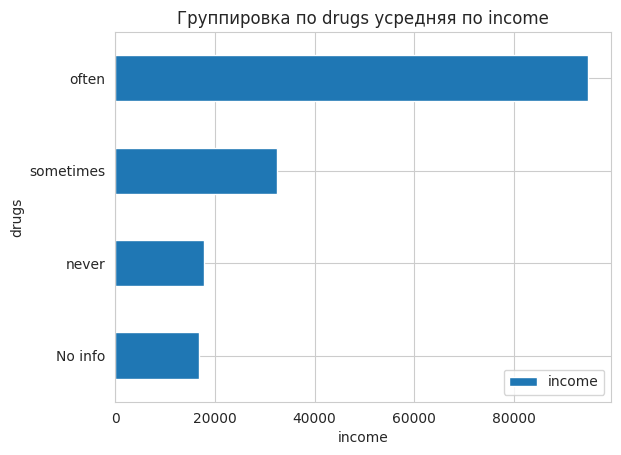

In [194]:
countplot(df,group = 'drugs', mean = 'income')

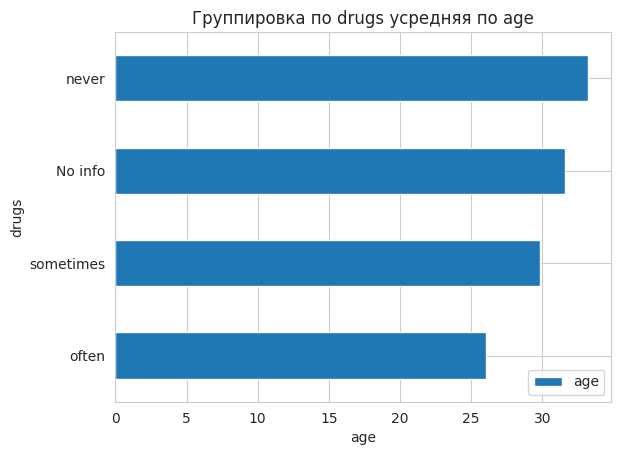

In [195]:
countplot(df,group = 'drugs', mean = 'age')

## Income

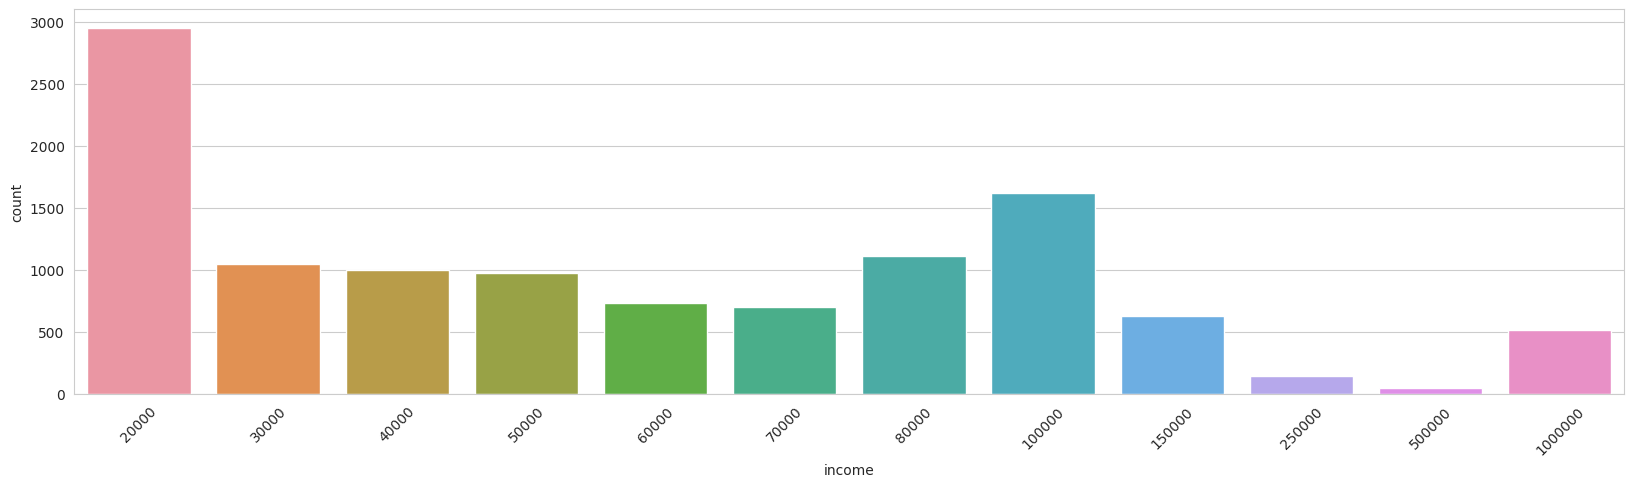

In [197]:
plt.figure(figsize=(20, 5))
sns.countplot(x='income', data=df.query("income !=0"),
)
plt.xticks(rotation = 45)
plt.show()

## Education

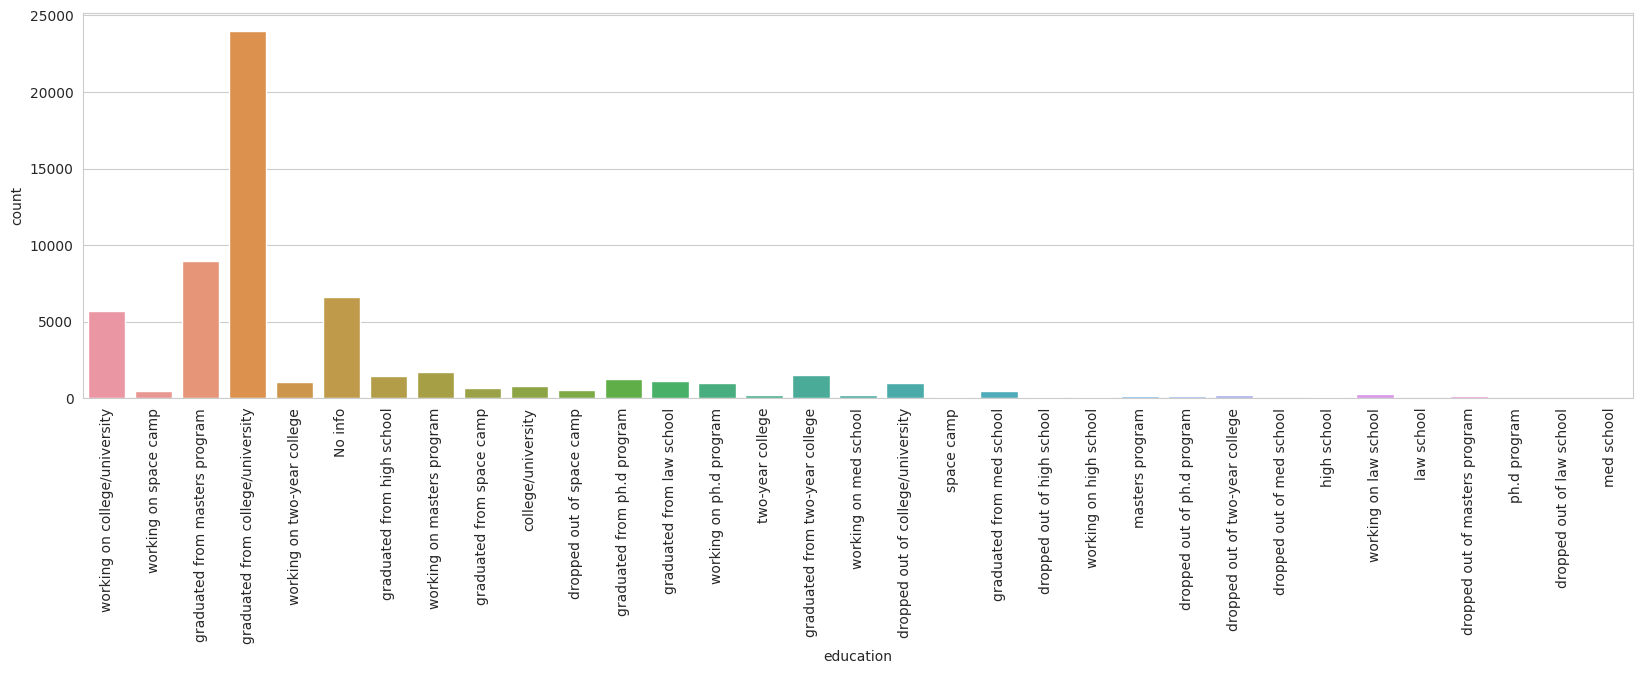

In [199]:
plt.figure(figsize=(20, 5))
sns.countplot(x='education', data=df,
)
plt.xticks(rotation = 90)
plt.show()

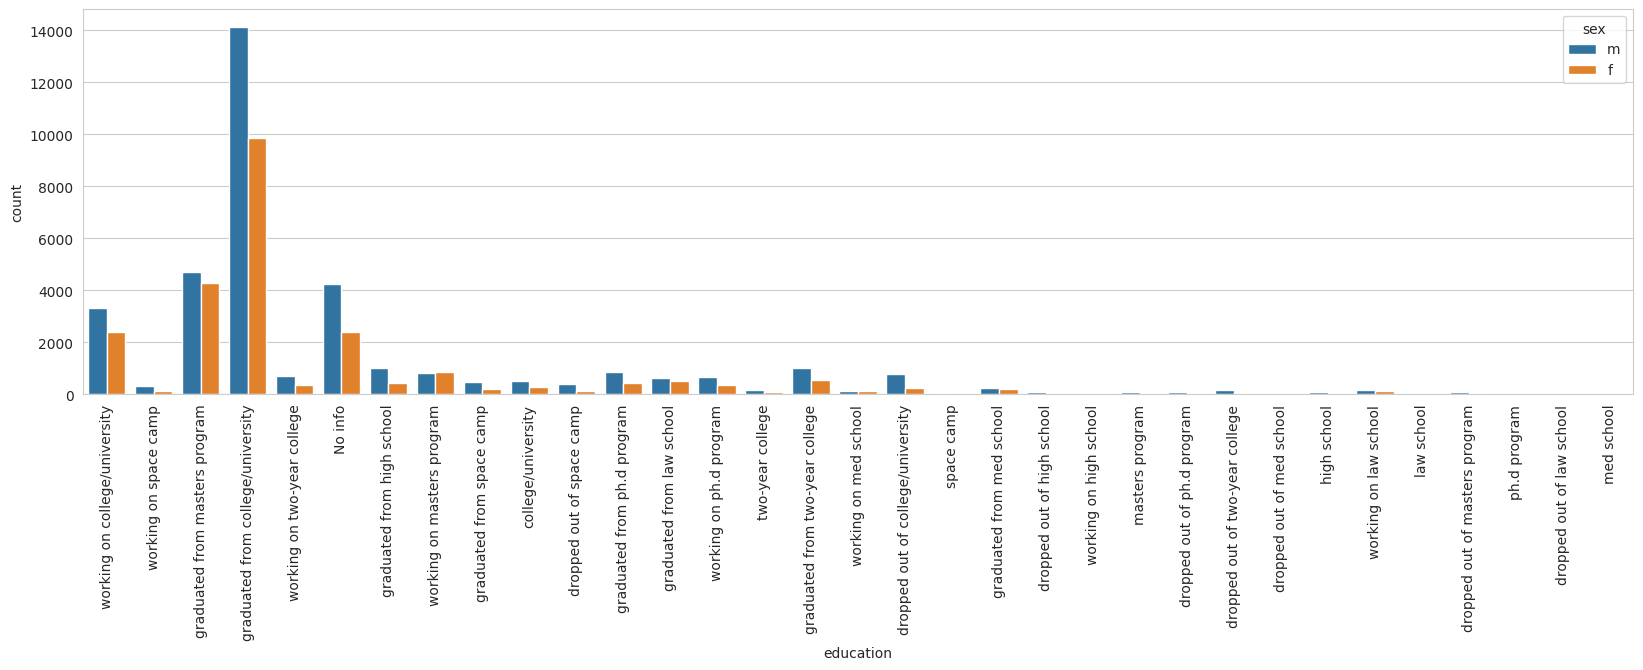

In [201]:
plt.figure(figsize=(20, 5))
sns.countplot(x='education', data=df,
hue='sex')
plt.xticks(rotation = 90)
plt.show()

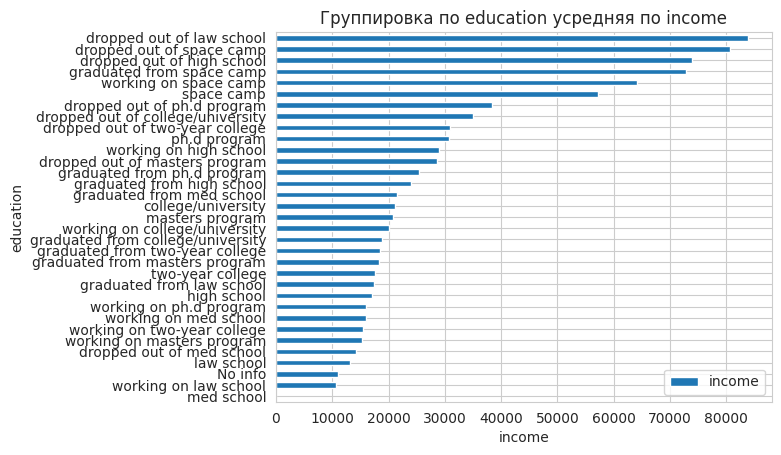

In [202]:
countplot(df,group = 'education', mean = 'income')

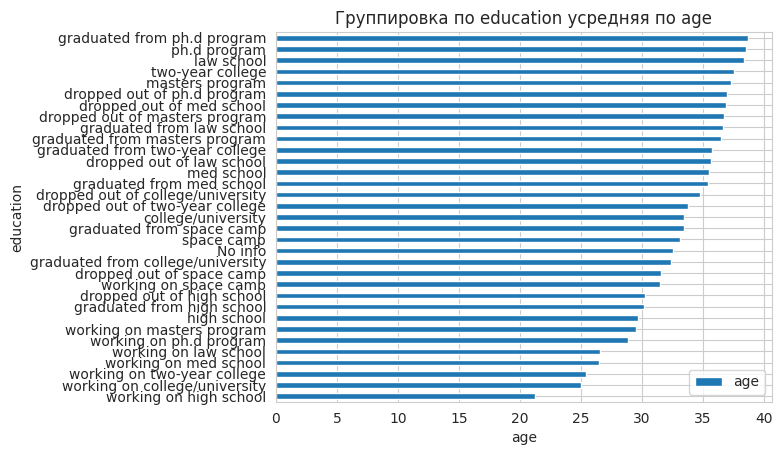

In [203]:
countplot(df,group = 'education', mean = 'age')

## Ethnicity

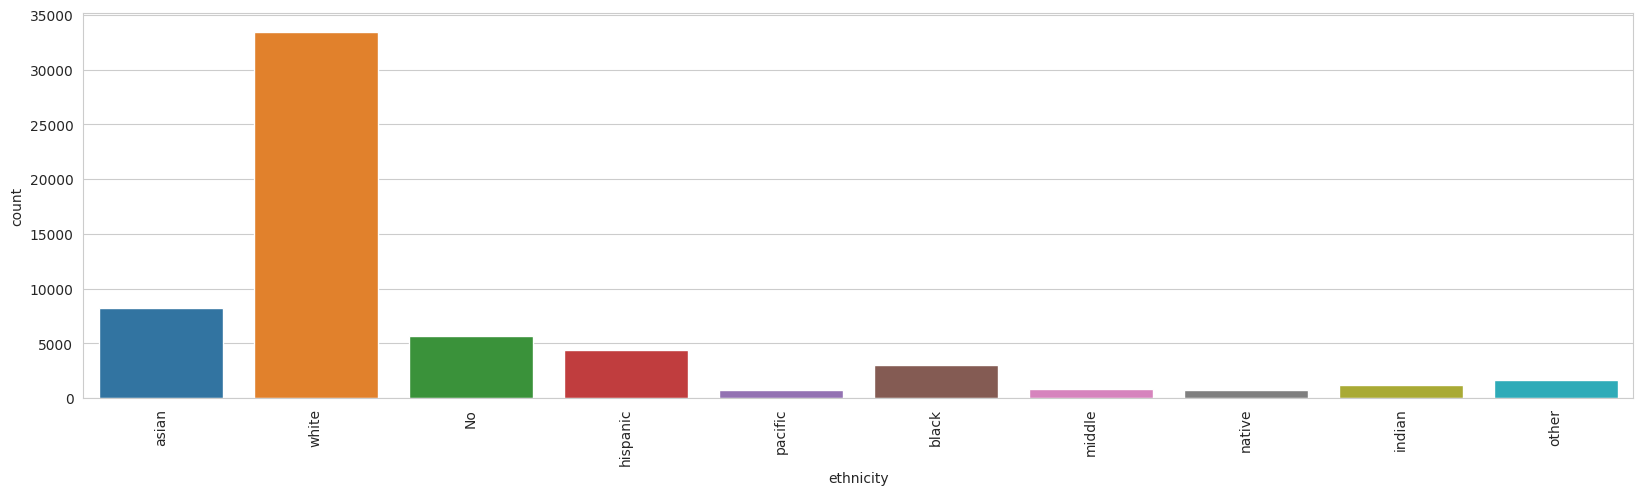

In [211]:
plt.figure(figsize=(20, 5))
sns.countplot(x='ethnicity', data=df,
)
plt.xticks(rotation = 90)
plt.show()

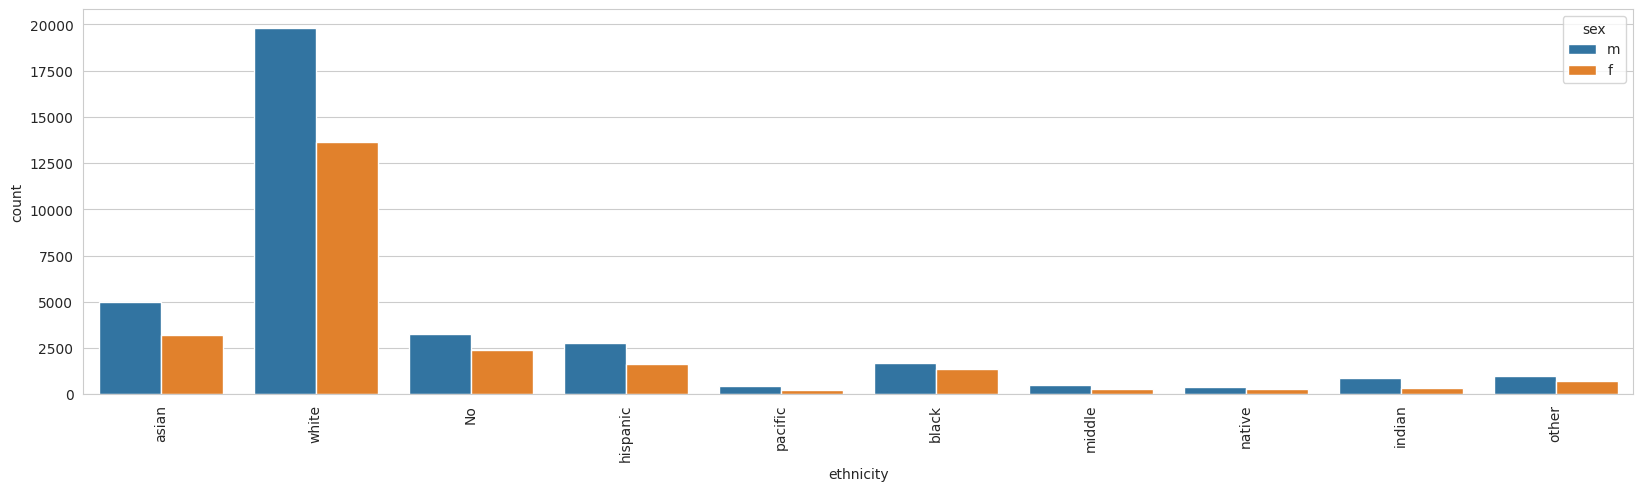

In [212]:
plt.figure(figsize=(20, 5))
sns.countplot(x='ethnicity', data=df,
hue='sex')
plt.xticks(rotation = 90)
plt.show()

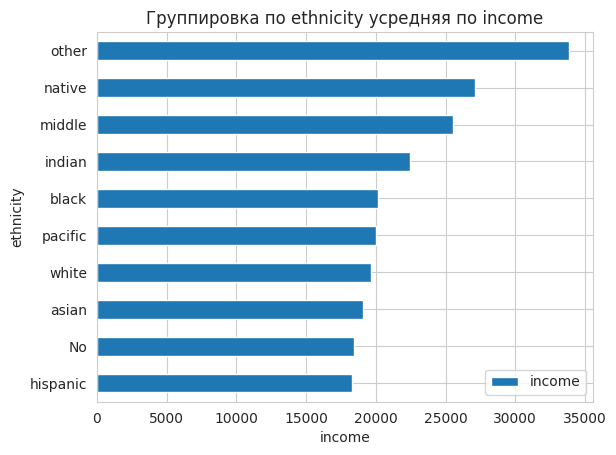

In [213]:
countplot(df,group = 'ethnicity', mean = 'income')

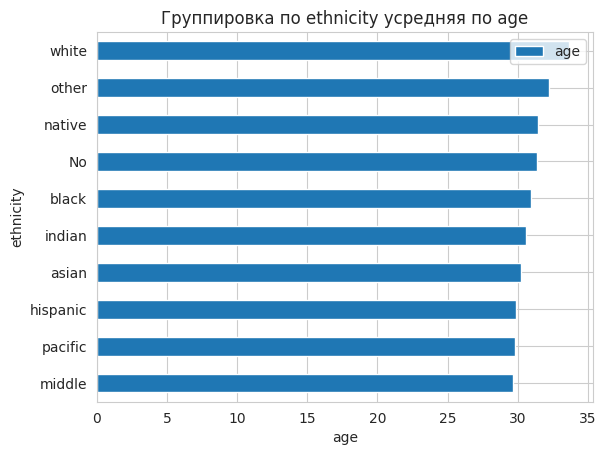

In [214]:
countplot(df,group = 'ethnicity', mean = 'age')

## pets

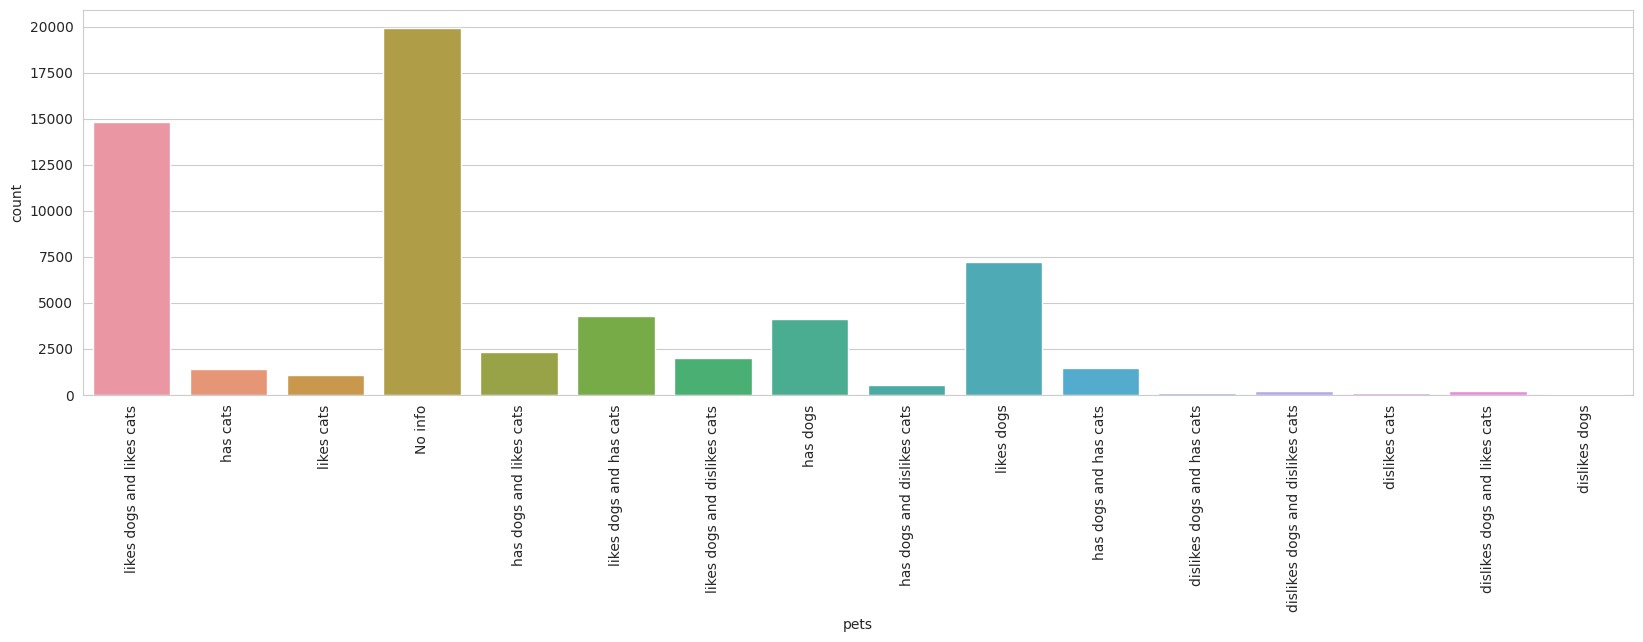

In [222]:
plt.figure(figsize=(20, 5))
sns.countplot(x='pets', data=df,
)
plt.xticks(rotation = 90)
plt.show()

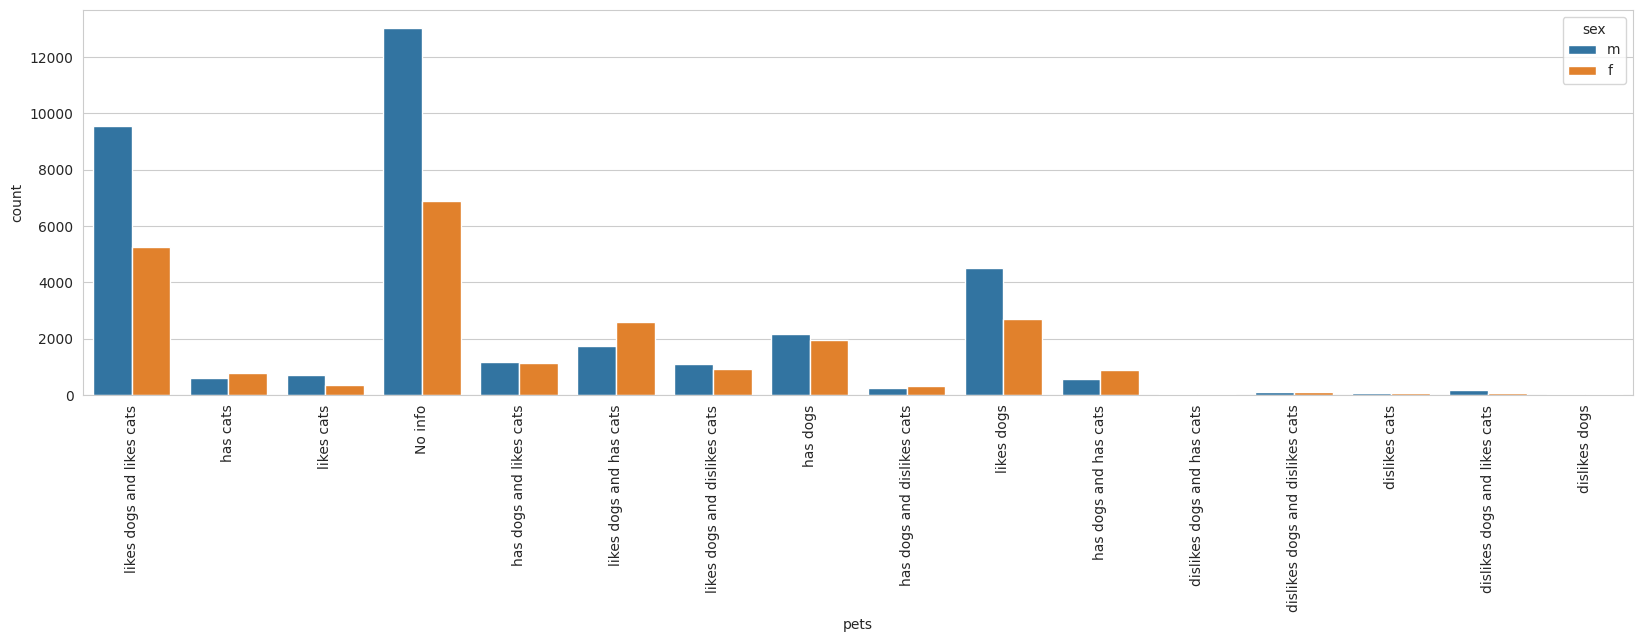

In [223]:
plt.figure(figsize=(20, 5))
sns.countplot(x='pets', data=df,
hue='sex')
plt.xticks(rotation = 90)
plt.show()

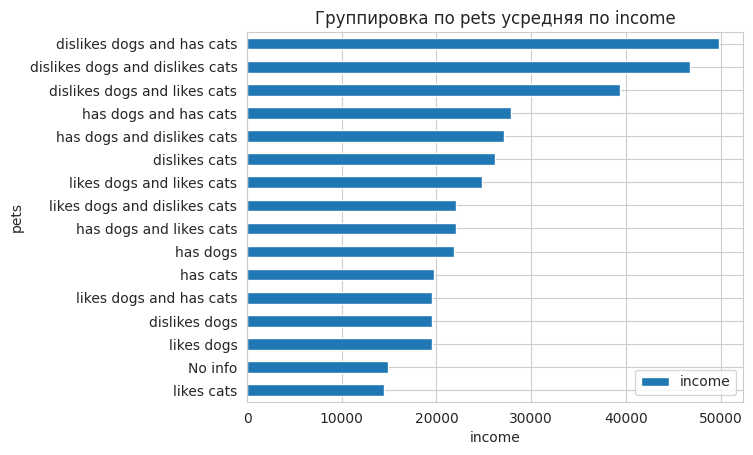

In [225]:
countplot(df,group = 'pets', mean = 'income')

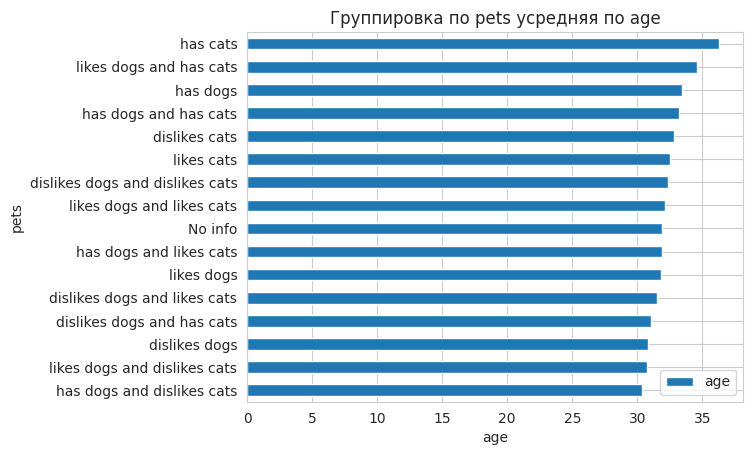

In [226]:
countplot(df,group = 'pets', mean = 'age')